In [50]:

import kagglehub
brunogrisci_leukemia_gene_expression_cumida_path = kagglehub.dataset_download('brunogrisci/leukemia-gene-expression-cumida')

print('Data source import complete.')


Data source import complete.


Dataset: Leukemia gene expression - CuMiDa

Dataset type: high-dimensional data (22283 columns gene with 64 sample rows)

Goals:
- select relevant genes using LASSO in multinomial regression
- predict leukemia subtype using Multi Layer Perceptron (MLP) with genes selected by LASSO
- evaluate LASSO+MLP models using Balanced Accuracy metric that suitable for imbalanced class

# Load data

In [51]:
# import data from kaggle

import pandas as pd
data = pd.read_csv('Leukemia_GSE9476.csv')

# convert the data to a Pandas dataframe
df_leukemia = pd.DataFrame(data)

# show dataset
df_leukemia

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,PBSC_CD34,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,61,PBSC_CD34,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,62,PBSC_CD34,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,63,PBSC_CD34,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


# Data preprocessing

In [52]:
df_leukemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 22285 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(22283), int64(1), object(1)
memory usage: 10.9+ MB


In [53]:
df_leukemia.isnull().sum()

,0
samples,0
type,0
1007_s_at,0
1053_at,0
117_at,0
...,...
AFFX-ThrX-5_at,0
AFFX-ThrX-M_at,0
AFFX-TrpnX-3_at,0
AFFX-TrpnX-5_at,0


In [54]:
df_leukemia.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
59,False
60,False
61,False
62,False


In [55]:
df_leukemia.duplicated().sum()

0

In [56]:
print(df_leukemia['type'].unique())

['Bone_Marrow_CD34' 'Bone_Marrow' 'AML' 'PB' 'PBSC_CD34']


In [57]:
# change y to categoric variable

df_leukemia['type'] = df_leukemia['type'].replace({'Bone_Marrow_CD34':1,
                                                   'Bone_Marrow': 2,
                                                   'AML': 3,
                                                   'PB': 4,
                                                   'PBSC_CD34': 5})
df_leukemia['type'] = df_leukemia['type'].astype('category')

<ipython-input-57-d2ceed9efcd6>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_leukemia['type'] = df_leukemia['type'].replace({'Bone_Marrow_CD34':1,


In [58]:
# show new dataframe

df_leukemia

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,1,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,1,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,1,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,1,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,1,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,5,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,61,5,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,62,5,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,63,5,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


In [59]:
# make sure y is already a categorical variable

print(df_leukemia['type'].unique())

[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]


In [60]:
# counts every class

df_leukemia['type'].value_counts(normalize=False)

,count
type,
3,26
2,10
4,10
5,10
1,8


In [61]:
# drop column that not relevant in our next steps

df_leukemia_ti=df_leukemia.drop('samples',axis=1)

In [62]:
# show new dataframe (without 'samples' column)

df_leukemia_ti

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,4.664924,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,1,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,5.171835,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,1,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,4.775709,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,1,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,4.829844,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,1,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,5.245049,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,4.691377,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,5,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,4.968642,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,5,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,4.815901,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,5,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,5.036441,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


# Data splitting and scaling

In [63]:
X = df_leukemia_ti.drop('type', axis=1)
y = df_leukemia_ti['type']

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=1234)

In [65]:
# create a new DataFrame with scaled values and original column names

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [66]:
# print the shapes of the data and labels

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (44, 22283)
y_train shape: (44,)
X_test shape: (20, 22283)
y_test shape: (20,)


In [67]:
# show the train df, to make sure the scaling process done

X_train_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.816537,0.298010,0.074035,0.300453,0.615881,0.605271,0.272372,0.342756,0.052619,0.464266,...,0.378263,0.470093,0.450184,0.439735,0.480591,0.336381,0.453685,0.278439,0.384972,0.417614
1,0.443106,0.345260,0.066941,0.256809,0.305579,0.199412,0.392747,0.293436,0.901667,0.313015,...,0.573643,0.837838,0.275770,0.417027,0.334882,0.067819,0.166629,0.174423,0.311941,0.266708
2,0.487774,1.000000,0.770471,0.601946,0.409838,0.344372,0.415490,0.480896,0.051186,0.305733,...,0.326041,0.442210,0.302469,0.224920,0.356387,0.447461,0.054881,0.080086,0.166667,0.268534
3,0.801155,0.471070,0.076428,0.894510,0.593982,0.537877,1.000000,0.621771,0.267464,0.363246,...,0.936765,0.874944,0.914481,0.887087,0.345051,0.276608,0.627421,0.339309,0.354891,0.300969
4,0.691100,0.234226,0.068197,0.413270,0.021609,0.283205,0.260250,0.515017,0.706720,0.301751,...,0.521687,0.489866,0.450393,0.564348,0.279688,0.310680,0.029731,0.146249,0.194223,0.252940
5,0.601802,0.371568,0.050642,0.430290,0.385625,0.248211,0.347237,0.244928,0.745692,0.203099,...,0.306809,0.549254,0.176982,0.172344,0.435250,0.206636,0.157475,0.136008,0.197131,0.117417
6,0.701383,0.190078,0.499700,0.116142,0.106837,0.396750,0.398985,0.000000,0.686012,0.073767,...,0.567948,0.837350,0.707628,0.728485,0.072260,0.000000,0.133444,0.620340,0.613805,0.247306
7,0.623856,0.183477,0.022686,0.391231,0.721596,0.371066,0.475487,0.370628,0.263218,0.129298,...,0.545158,0.778769,0.383681,0.270621,0.777763,0.238146,0.352244,0.094727,0.325588,0.652025
8,0.694414,0.129341,0.155758,0.834885,0.925469,0.395136,0.604548,0.694121,0.402151,0.340777,...,0.529820,0.720966,0.812530,0.779050,0.350789,0.315478,0.280258,0.272886,0.158471,0.353714
9,0.909570,0.611646,0.414475,0.511612,0.489810,0.300437,0.416695,0.565412,0.115381,0.588664,...,0.153945,0.667452,0.119870,0.106023,0.492836,0.395051,1.000000,0.633768,0.503711,0.329100


In [68]:
import numpy as np
from sklearn.linear_model import LogisticRegression

C_value = 0.2
logreg = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=200, C=C_value)
logreg.fit(X_train, y_train)

selected_features = np.where(np.abs(logreg.coef_).sum(axis=0) > 0)[0]

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

selected_features = X.columns[np.any(np.abs(logreg.coef_) > 0, axis=0)]

print(f"Number of selected features: {len(selected_features)}")
print("Selected feature names:")
for feature in selected_features:
    print(feature)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Number of selected features: 21
Selected feature names:
200736_s_at
201105_at
201765_s_at
201850_at
204007_at
205500_at
206522_at
206674_at
207008_at
209062_x_at
209395_at
210119_at
210376_x_at
211163_s_at
212052_s_at
219672_at
221345_at
221754_s_at
44040_at
AFFX-HUMGAPDH/M33197_5_at
AFFX-HUMGAPDH/M33197_M_at


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import numpy as np

# make a function to access multiclass confusion metrics values

def cm_metrics(conf_matrix, set_name, class_names):
    num_classes = conf_matrix.shape[0]
    TP = []
    FP = []
    TN = []
    FN = []

    for i in range(num_classes):
        TP.append(conf_matrix[i, i])
        FP.append(sum(conf_matrix[:, i]) - conf_matrix[i, i])
        TN.append(np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)))
        FN.append(sum(conf_matrix[i, :]) - conf_matrix[i, i])

    print(f"Confusion Matrix Metrics for {set_name} set:\n")
    for i in range(num_classes):
        class_name = class_names[i]  # Get the meaningful name for each class index
        print(f"Class '{class_name}':\nTP = {TP[i]}, FP = {FP[i]}, TN = {TN[i]}, FN = {FN[i]}\n")
    print()

# make a function for MLP

def MLP(X_train, y_train, X_test, y_tes, hidden_unit, max_iter):
    # create an MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=hidden_unit, max_iter=max_iter, random_state=42)

    # training step
    mlp.fit(X_train, y_train)
    y_train_pred = mlp.predict(X_train)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_BA = balanced_accuracy_score(y_train, y_train_pred)

    # testing step
    y_test_pred = mlp.predict(X_test)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_BA = balanced_accuracy_score(y_test, y_test_pred)

    # call cm_metrics function
    class_names = ['Bone_Marrow_CD34', 'Bone_Marrow', 'AML', 'PB', 'PBSC_CD34']
    cm_metrics(train_conf_matrix, "training", class_names)
    cm_metrics(test_conf_matrix, "test", class_names)

    return mlp, train_BA, test_BA

In [70]:
# using MLP classifier in dataset with all gene columns

mlp_all, train_BA_all, test_BA_all = MLP(X_train, y_train,
                                      X_test, y_test,
                                      hidden_unit=64, max_iter=700)

print(f"Training Balanced Accuracy: {train_BA_all}")
print(f"Test Balanced Accuracy: {test_BA_all}")

Confusion Matrix Metrics for training set:

Class 'Bone_Marrow_CD34':
TP = 6, FP = 29, TN = 9, FN = 0

Class 'Bone_Marrow':
TP = 0, FP = 0, TN = 36, FN = 8

Class 'AML':
TP = 1, FP = 0, TN = 28, FN = 15

Class 'PB':
TP = 8, FP = 0, TN = 36, FN = 0

Class 'PBSC_CD34':
TP = 0, FP = 0, TN = 38, FN = 6


Confusion Matrix Metrics for test set:

Class 'Bone_Marrow_CD34':
TP = 2, FP = 16, TN = 2, FN = 0

Class 'Bone_Marrow':
TP = 0, FP = 0, TN = 18, FN = 2

Class 'AML':
TP = 0, FP = 0, TN = 10, FN = 10

Class 'PB':
TP = 2, FP = 0, TN = 18, FN = 0

Class 'PBSC_CD34':
TP = 0, FP = 0, TN = 16, FN = 4


Training Balanced Accuracy: 0.4125
Test Balanced Accuracy: 0.4


In [71]:
# using MLP classifier in dataset with selected 21 gene columns by LASSO

mlp_21, train_BA_21, test_BA_21 = MLP(X_train_selected, y_train,
                                      X_test_selected, y_test,
                                      hidden_unit=64, max_iter=700)

print(f"Training Balanced Accuracy: {train_BA_21}")
print(f"Test Balanced Accuracy: {test_BA_21}")

Confusion Matrix Metrics for training set:

Class 'Bone_Marrow_CD34':
TP = 6, FP = 0, TN = 38, FN = 0

Class 'Bone_Marrow':
TP = 8, FP = 0, TN = 36, FN = 0

Class 'AML':
TP = 16, FP = 0, TN = 28, FN = 0

Class 'PB':
TP = 8, FP = 0, TN = 36, FN = 0

Class 'PBSC_CD34':
TP = 6, FP = 0, TN = 38, FN = 0


Confusion Matrix Metrics for test set:

Class 'Bone_Marrow_CD34':
TP = 2, FP = 0, TN = 18, FN = 0

Class 'Bone_Marrow':
TP = 2, FP = 0, TN = 18, FN = 0

Class 'AML':
TP = 8, FP = 0, TN = 10, FN = 2

Class 'PB':
TP = 2, FP = 0, TN = 18, FN = 0

Class 'PBSC_CD34':
TP = 4, FP = 2, TN = 14, FN = 0


Training Balanced Accuracy: 1.0
Test Balanced Accuracy: 0.96


# Dataviz

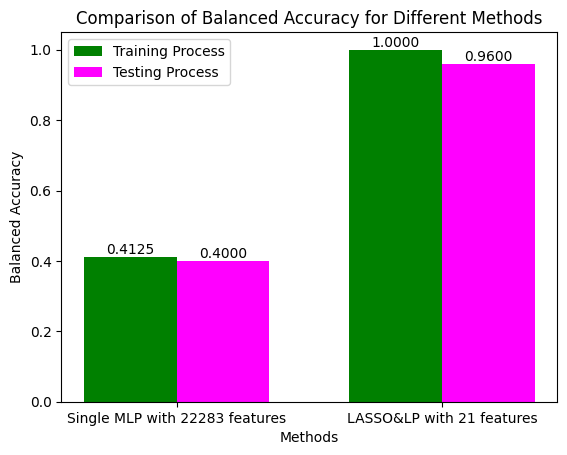

In [73]:
# visualize the MLPs results (before and after LASSO)

import matplotlib.pyplot as plt

model_names = ['Single MLP with 22283 features','LASSO&LP with 21 features']

# store the balanced accuracy values in lists for training and testing
train_baccs = [train_BA_all, train_BA_21]
test_baccs = [test_BA_all, test_BA_21]

num_models = len(model_names)

bar_width = 0.35

index = np.arange(num_models)

# create the vertical bar plot with train and test balanced accuracy
plt.bar(index, train_baccs, bar_width, label='Training Process', color='green')
plt.bar(index + bar_width, test_baccs, bar_width, label='Testing Process', color='magenta')

# set the labels and title
plt.xticks(index + bar_width / 2, model_names)
plt.ylabel('Balanced Accuracy')
plt.xlabel('Methods')
plt.title('Comparison of Balanced Accuracy for Different Methods')

# add text labels on each bar
for i in range(num_models):
    plt.text(i, train_baccs[i], f'{train_baccs[i]:.4f}', ha='center', va='bottom', color='black')
    plt.text(i + bar_width, test_baccs[i], f'{test_baccs[i]:.4f}', ha='center', va='bottom', color='black')

plt.legend(loc='upper left') # place the legend inside the plot

plt.savefig('plot BA LASSO-MLP Leukemia.jpg') # save the plot as JPG

plt.show() # display the plot


Conclusions:
- LASSO successfully reduce data dimension from 22283 columns to 21 columns. Those columns are: 200736_s_at, 201105_at, 201765_s_at, 201850_at, 204007_at, 205500_at, 206522_at, 206674_at, 207008_at, 209062_x_at, 209395_at, 210119_at, 210376_x_at, 211163_s_at, 212052_s_at, 219672_at, 221345_at, 221754_s_at, 44040_at, AFFX-HUMGAPDH/M33197_5_at, AFFX-HUMGAPDH/M33197_M_at
- 21 selected gene columns by LASSO make MLP models more simple.
- Using only 21 selected gene columns by LASSO can increases the Balanced Accuracy values, both on training and testing.
- This LASSO-MLP models can still be developed in the future to make sure the models are not overfit.